In [11]:
library(tidyverse)
library(ggplot2)

In [12]:
df <- read_csv('data/crimedata_csv_all_years_modified.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  DATE = col_datetime(format = ""),
  DAY_OF_WEEK_NAME = col_character(),
  DAY_OF_WEEK = col_double()
)



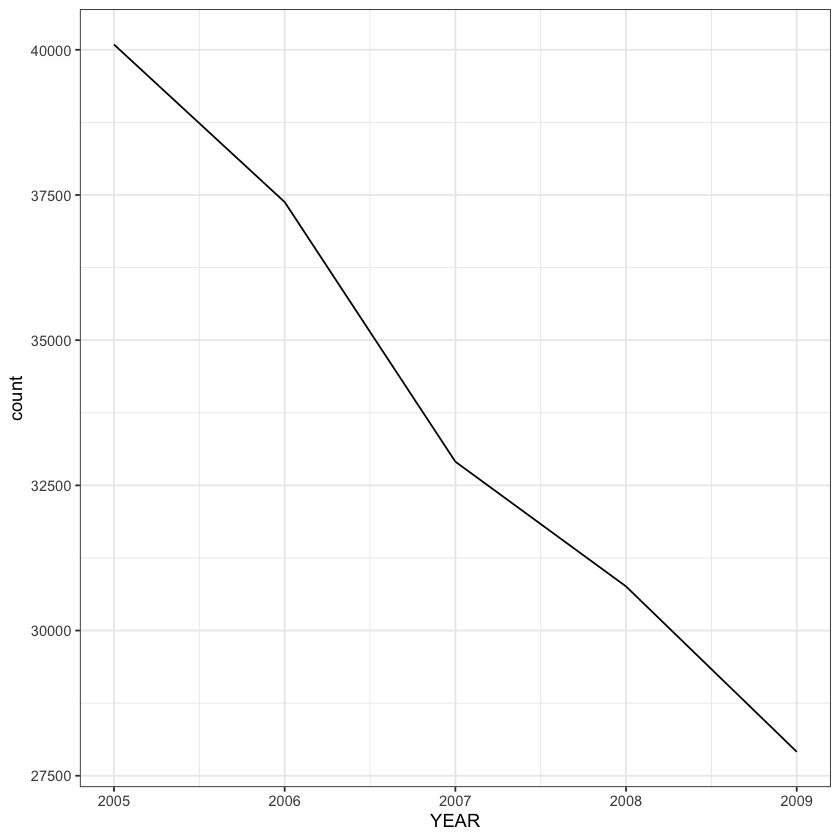

In [13]:
df %>% 
    group_by(YEAR) %>%
    filter(YEAR >= 2005 & YEAR < 2010) %>%
    mutate(count = length(TYPE)) %>%
    ggplot() +
    geom_line(aes(x=YEAR, y=count)) +
    theme_bw()

In [14]:
plot_func <- function(df, start, end, neighbourhood_1, crime, time_scale) {
    
    df <- df %>% filter(YEAR >= start & YEAR <= end)
    
    if (crime == 'ALL') {
        if (neighbourhood_1 == 'ALL') {
            df <- df %>% 
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
        } else {
            df <- df %>% 
                filter(NEIGHBOURHOOD == neighbourhood_1) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
        }   
    } else {
        
        if (neighbourhood_1 == 'ALL') {
            df <- df %>% 
                filter(TYPE == crime) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
        } else {
            df <- df %>% 
                filter(NEIGHBOURHOOD == neighbourhood_1 & TYPE == crime) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
        }
    }
    
    df %>% 
        ggplot() +
        geom_line(aes(x={{time_scale}}, y=count)) +
        theme_bw() 
}

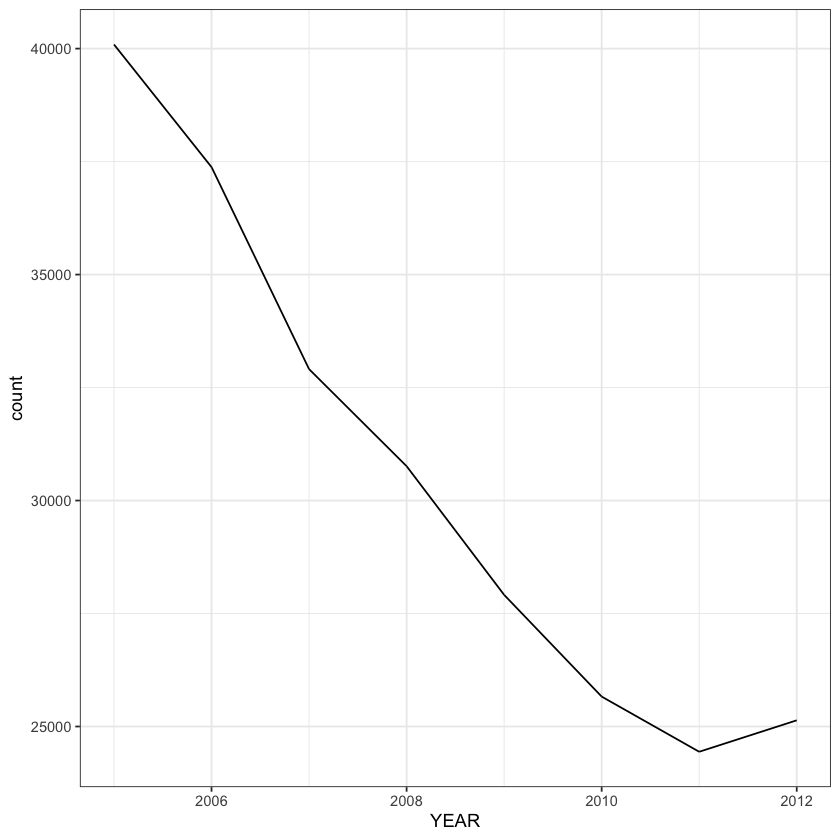

In [15]:
plot_func(df, 2005, 2012, 'ALL', 'ALL', YEAR)